<h1 align="center">Analítica de datos para la toma de decisiones basadas en información</h1>
<h1 align="center">Serie de tiempo: Temperaturas Mínimas Diarias</h1>
<h1 align="center">2023</h1>
<h1 align="center">MEDELLÍN - COLOMBIA </h1>

*** 
|[![Gmail](https://img.shields.io/badge/Gmail-D14836?style=plastic&logo=gmail&logoColor=white)](mailto:carlosalvarezh@gmail.com)|<carlosalvarezh@gmail.com>|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlosalvarezh/Curso_CEC_EAFIT/blob/main/Ejemplos_C02_4_TemperaturasMínimasDiarias.ipynb)
|-:|:-|--:|
|[![LinkedIn](https://img.shields.io/badge/linkedin-%230077B5.svg?style=plastic&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/carlosalvarez5/)|[![@alvarezhenao](https://img.shields.io/twitter/url/https/twitter.com/alvarezhenao.svg?style=social&label=Follow%20%40alvarezhenao)](https://twitter.com/alvarezhenao)|[![@carlosalvarezh](https://img.shields.io/badge/github-%23121011.svg?style=plastic&logo=github&logoColor=white)](https://github.com/carlosalvarezh)|

<table>
 <tr align=left><td><img align=left src="https://github.com/carlosalvarezh/Curso_CEC_EAFIT/blob/main/images/CCLogoColorPop1.gif?raw=true" width="25">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license.(c) Carlos Alberto Alvarez Henao</td>
</table>

***

## Introducción

Este conjunto de datos describe las temperaturas mínimas diarias a lo largo de $10$ años ($1981-1990$) en la ciudad de *Melbourne*, *Australia*.

Las unidades están en grados Celsius y hay $3.650$ observaciones en total. La fuente de los datos se atribuye al *Buró Australiano de Meteorología*.

El conjunto de datos lo puede descargar desde [este enlace](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv).

A continuación, se presenta un ejemplo de cómo cargar el conjunto de datos empleando `Pandas`.

### Importación de los módulos a ser usados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carga / Generación de datos

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
series = pd.read_csv(url, header=0, index_col=0, parse_dates=True).squeeze('columns')

Esta línea de código realiza varias acciones en Python utilizando la biblioteca Pandas. Veamos cada parte:

```python
series = pd.read_csv(url, header=0, index_col=0, parse_dates=True).squeeze('columns')
```
- `pd.read_csv` es una función de Pandas que se utiliza para leer un archivo CSV desde una URL o un archivo local y cargarlo en un DataFrame de Pandas. Aquí se están pasando varios argumentos a esta función:
     - `url`: Es la dirección URL o el nombre del archivo CSV que se desea leer.
     - `header=0`: Indica que la primera fila del archivo CSV contiene los nombres de las columnas.
     - `index_col=0`: Indica que la primera columna del archivo CSV debe usarse como índice del DataFrame.
     - `parse_dates=True`: Le dice a Pandas que intente analizar las columnas que contienen fechas como datos de tipo fecha.
   - Después de cargar el archivo CSV en un DataFrame, se aplica el método `squeeze('columns')` al DataFrame resultante. Este método se utiliza para convertir el DataFrame en una Serie de Pandas si el DataFrame tiene una sola columna. En otras palabras, si el DataFrame tiene solo una columna, se extrae esa columna y se almacena en la variable `series`.

En resumen, esta línea de código carga un archivo CSV desde una URL, lo convierte en un DataFrame de Pandas y, si ese DataFrame tiene solo una columna, extrae esa columna y la almacena en la variable `series`. La variable `series` contendrá datos en forma de una [`Serie de Pandas`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html), que es una estructura unidimensional similar a un arreglo o lista, pero con etiquetas en el índice.

### Exploración de los datos

In [3]:
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [4]:
series.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Series name: Temp
Non-Null Count  Dtype  
--------------  -----  
3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [18]:
series.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

### Visualización de datos

#### Gráfico de Línea de Series Temporales

La primera, y quizás más popular, visualización para series temporales es el gráfico de línea. En este gráfico, el tiempo se muestra en el eje $x$ con los valores de las observaciones a lo largo del eje $y$.

A continuación, se muestra un ejemplo de visualizar la `Series` de Pandas del conjunto de datos de *Temperaturas Mínimas Diarias* directamente como un gráfico de línea.

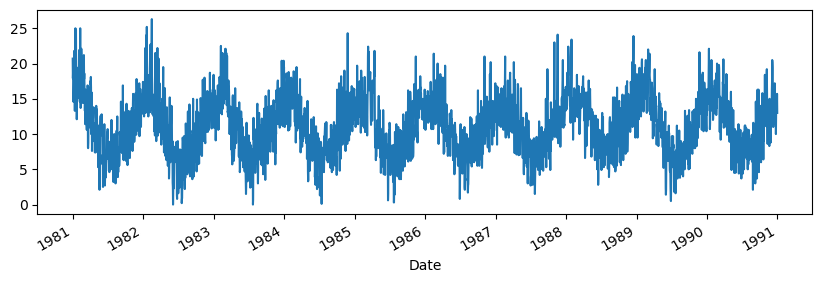

In [5]:
plt.figure(figsize=(10, 3))
series.plot()
plt.show()

Comparar gráficos de línea para el mismo intervalo, como de un día a otro, de un mes a otro y de un año a otro, puede ser útil. El conjunto de datos de *Temperaturas Mínimas Diarias* abarca $10$ años. Podemos agrupar los datos por año, empleando la función [`series.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) y crear un gráfico de línea para cada año para una comparación directa. El siguiente ejemplo ilustra cómo hacerlo. Luego, los grupos se enumeran y las observaciones de cada año se almacenan como columnas en un nuevo `DataFrame`. Finalmente, se crea un gráfico de este `DataFrame` modificado, donde cada columna se visualiza como un subplot y se eliminan las leyendas para reducir el desorden.

<Figure size 1000x600 with 0 Axes>

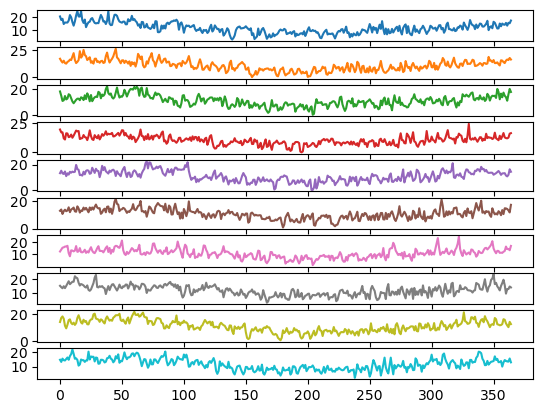

In [6]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values

plt.figure(figsize=(10, 6))
years.plot(subplots=True, legend=False)
plt.show()

#### Histogramas y Gráficos de Densidad en Series Temporales

Otra visualización importante es la distribución de las propias observaciones. Esto significa un gráfico de los valores sin el orden temporal. 

Algunos métodos de pronóstico de series temporales lineales asumen una distribución bien comportada de las observaciones (es decir, una curva de campana o distribución normal). Esto puede verificarse explícitamente utilizando herramientas como pruebas estadísticas de hipótesis. Sin embargo, los gráficos pueden proporcionar una primera verificación útil de la distribución de las observaciones tanto en las observaciones originales como después de cualquier tipo de transformación de datos realizada.

El ejemplo siguiente crea un histograma de las observaciones en el conjunto de datos de *Temperaturas Mínimas Diarias*. Un histograma agrupa los valores en intervalos, y la frecuencia o cantidad de observaciones en cada intervalo puede proporcionar una idea de la distribución subyacente de las observaciones.

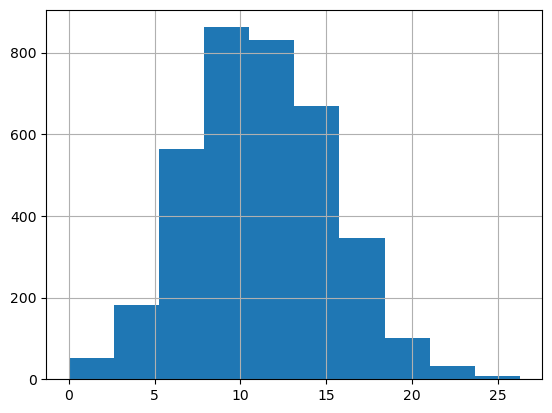

In [7]:
series.hist()
plt.show()

El histograma muestra una distribución que parece ser fuertemente gaussiana. La función de trazado selecciona automáticamente el tamaño de los intervalos basándose en la dispersión de valores en los datos.

#### Gráfico de densidad

Podemos obtener una mejor idea de la forma de la distribución de las observaciones mediante el uso de un gráfico de densidad. La línea de código [`series.plot(kind='kde')`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.kde.html) se utiliza para crear un gráfico de densidad de kernel (*KDE*, por sus siglas en inglés de *Kernel Density Estimate*). Este es similar al histograma, excepto que se utiliza una función para ajustar la distribución de las observaciones y se utiliza una línea suave para resumir esta distribución. A continuación, se muestra un ejemplo de un gráfico de densidad del conjunto de datos de *Temperaturas Mínimas Diarias*.

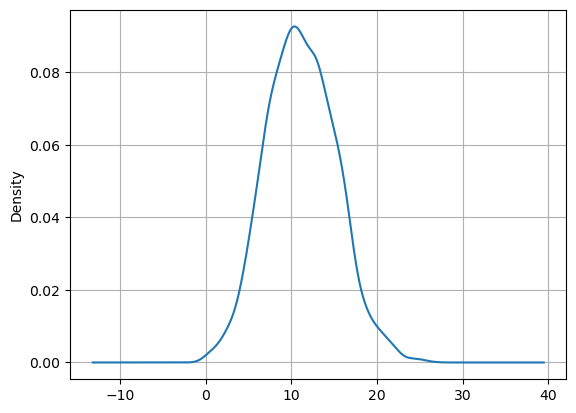

In [8]:
series.plot(kind='kde')
plt.grid(True)
plt.show()

El gráfico mostrado proporciona un resumen más claro de la distribución de las observaciones. Podemos observar que tal vez la distribución es un poco asimétrica y quizás un poco puntiaguda para ser gaussiana.

Ver una distribución como esta podría sugerir la exploración posterior de pruebas estadísticas de hipótesis para verificar formalmente si la distribución es gaussiana y, quizás, técnicas de preparación de datos para reformar la distribución, como la transformación [*Box-Cox*](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation).

#### Gráficos de Caja en Series Temporales por Intervalo

Si bien los histogramas y los gráficos de densidad proporcionan información sobre la distribución de todas las observaciones, es posible que nos interese la distribución de valores por intervalo de tiempo.

Otro tipo de gráfico útil para resumir la distribución de observaciones es el gráfico de caja (`Boxplot`). Este gráfico dibuja un cuadro alrededor de los percentiles $25$ y $75$ de los datos, que capturan el $50\%$ intermedio de las observaciones. Se dibuja una línea en el percentil $50$ (la *mediana*) y se trazan los "*bigotes*" por encima y por debajo del cuadro para resumir los límites generales de las observaciones. Se dibujan puntos para los valores atípicos fuera de los bigotes o límites de los datos (*ouliers*). Los gráficos de caja se pueden crear y comparar para cada intervalo en una serie temporal, como años, meses o días.

A continuación, se muestra un ejemplo de agrupar el conjunto de datos de *Temperaturas Mínimas Diarias* por años, como se hizo anteriormente en el ejemplo del gráfico. Luego, se crea un gráfico de caja para cada año y se alinean uno al lado del otro para una comparación directa. Se aprovechará el agrupamiento por años que se realizó anteriormente (`years[name.year] = group.values`)

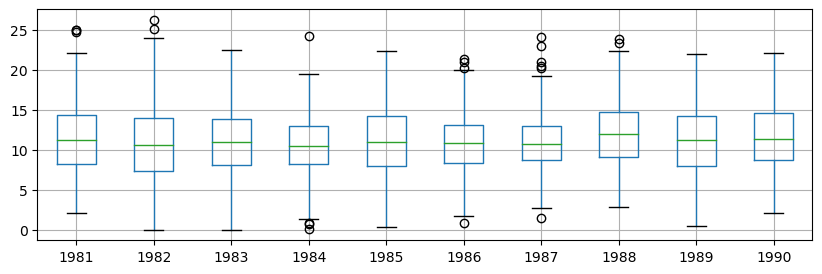

In [9]:
plt.figure(figsize=(10, 3))
years.boxplot()
plt.show()

Comparar gráficos de caja mediante intervalos consistentes es una herramienta útil. Dentro de un intervalo, puede ayudar a identificar valores atípicos (puntos por encima o por debajo de los "bigotes").

A lo largo de intervalos, en este caso años, podemos buscar tendencias de varios años, estacionalidad y otra información estructural que podría ser modelada.

También podríamos estar interesados en la distribución de valores a lo largo de los meses dentro de un año. El ejemplo a continuación crea $12$ gráficos de caja y bigotes, uno para cada mes del año $1990$, el último año en el conjunto de datos. En el ejemplo, primero se extraen solo las observaciones de $1990$. Luego, las observaciones se agrupan por mes, y cada mes se agrega a un nuevo `DataFrame` como una columna. Finalmente, se crea un gráfico de caja para cada columna de mes en el `DataFrame` recién construido.

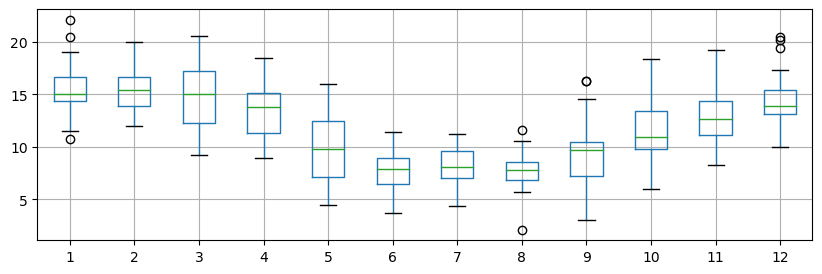

In [10]:
# create a boxplot of monthly data
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
plt.figure(figsize=(10, 3))
months.boxplot()
plt.show()

Al ejecutar el ejemplo, se generan 12 gráficos de caja, que muestran el cambio significativo en la distribución de las temperaturas mínimas a lo largo de los meses del año, desde el verano en el hemisferio sur en enero hasta el invierno en el hemisferio sur a mediados de año, y de regreso al verano nuevamente.

#### Mapas de calor en series temporales

Los mapas de calor en series temporales representan matrices de números como superficies, asignando colores únicos a los valores de cada celda. Estos mapas, conocidos como [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html), utilizan colores cálidos para resaltar valores más altos y colores fríos para destacar valores más bajos. Similar a los gráficos de caja, los mapas de calor permiten comparar observaciones en intervalos específicos.

Tomando el ejemplo de las *Temperaturas Mínimas Diarias*, se puede organizar las observaciones en una matriz donde las columnas representen años y las filas representen días, con la temperatura mínima en cada celda. Al generar un mapa de calor a partir de esta matriz, se puede visualizar patrones en la distribución de las temperaturas a lo largo del tiempo. Sin embargo, dado que `Pandas` no ofrece soporte directo para mapas de calor, en este caso se emplea la función [`matplotlib.pyplot.matshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html).

Para mejorar la disposición y comprensión, es común rotar ([transponer](https://en.wikipedia.org/wiki/Transpose)) la matriz de manera que cada fila represente un año y cada columna un día. Esto brinda una perspectiva más natural y orientada de izquierda a derecha para evaluar los datos a lo largo de los años y días. En resumen, los mapas de calor en series temporales proveen una representación visual efectiva para comprender patrones y tendencias en los datos a lo largo del tiempo, permitiendo comparaciones y análisis en intervalos específicos.

Nuevamente aprovechamos que ya tenemos loas años agrupados anteriormente y transponemos el DataFrame de pandas empleando el método [`.T`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html) (Transpose)

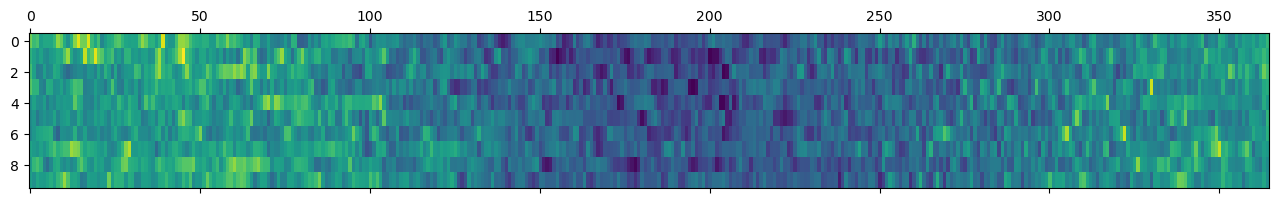

In [11]:
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

Al igual que con el ejemplo del gráfico de caja anterior, también podemos comparar los meses dentro de un año.

A continuación, se muestra un ejemplo de un mapa de calor que compara los meses del año $1990$. Cada columna representa un mes, mientras que las filas representan los días del mes del $1$ al $31$.

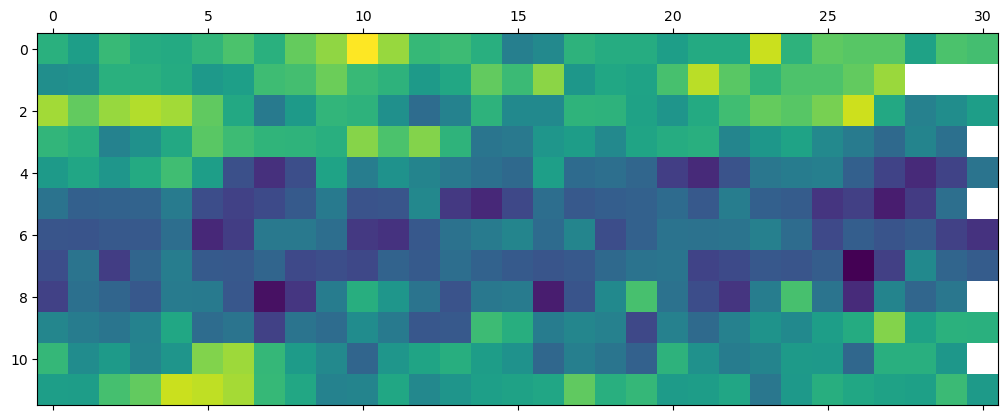

In [12]:
months = months.T
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

El ejecutar el ejemplo, se muestra la misma tendencia macro vista para cada año en el nivel de acercamiento de mes a mes.

También podemos observar algunas áreas blancas en la parte inferior del gráfico. Estos corresponden a datos faltantes para aquellos meses que tienen menos de $31$ días, siendo febrero un caso atípico con $28$ días en $1990$.

#### Gráficos de Dispersión de Retardo en Series Temporales

Los [*Gráficos de Dispersión de Retardo*](https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm) en *Series Temporales* son herramientas esenciales en la modelización de datos a lo largo del tiempo. Estos gráficos exploran la relación entre observaciones actuales y sus observaciones previas, conocidas como rezagos. `Pandas` proporciona una función llamada [`lag_plot`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.lag_plot.html) que traza la observación en el tiempo $t$ en el eje $x$ y la observación de `lag1` ($t-1$) en el eje $y$. Si los puntos se agrupan diagonalmente de la esquina inferior izquierda a la superior derecha, sugiere correlación positiva; si se agrupan diagonalmente de la esquina superior izquierda a la inferior derecha, sugiere correlación negativa. Una agrupación estrecha indica relación fuerte, mientras que dispersión alejada de la línea refleja relación débil.

Los gráficos de retraso ayudan a descubrir patrones de correlación y establecer relaciones significativas entre observaciones previas y actuales. Si los puntos siguen un patrón diagonal, positivo o negativo, puede indicar una dependencia significativa que puede ser modelada. Por otro lado, si los puntos se dispersan sin una tendencia clara, la relación puede ser débil o inexistente. Estos gráficos son especialmente útiles para identificar dependencias en series temporales y proporcionan información valiosa para construir modelos predictivos y analizar el comportamiento de los datos en función del tiempo.

En resumen, los gráficos de dispersión de retardo son una herramienta clave en el análisis de series temporales, revelando patrones de correlación que son cruciales para comprender las relaciones entre observaciones en diferentes momentos y permitiendo la construcción de modelos más precisos y efectivos.

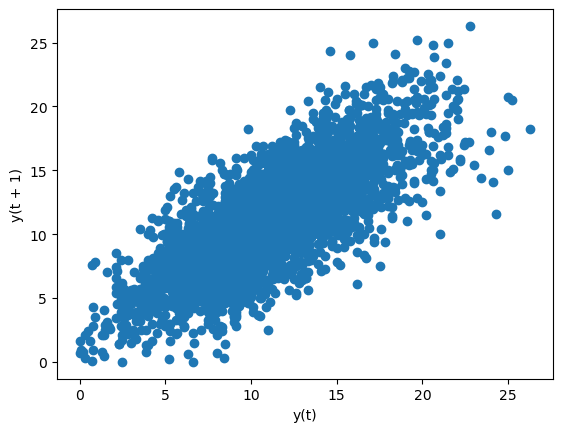

In [13]:
from pandas.plotting import lag_plot

lag_plot(series)
plt.show()

#### Gráficos de Autocorrelación en Series Temporales

Los [*Gráficos de Autocorrelación*](https://en.wikipedia.org/wiki/Autocorrelation) en Series Temporales permiten cuantificar y visualizar la relación entre observaciones y sus rezagos, es decir, las observaciones anteriores en el tiempo. Esta medida, conocida como autocorrelación, mide la correlación de una variable consigo misma en diferentes intervalos de tiempo. Los valores de autocorrelación varían entre $-1$ y $1$, donde un valor cercano a cero sugiere una correlación débil y valores cercanos a $-1$ o $1$ indican una correlación fuerte, ya sea negativa o positiva.

Para explorar cómo cambia esta relación a lo largo de los rezagos, se utilizan los Gráficos de Autocorrelación. Estos gráficos representan los coeficientes de autocorrelación calculados para cada observación y diferentes valores de rezago. Al observar estos gráficos, se pueden identificar patrones de correlación a lo largo del tiempo, lo que puede proporcionar información valiosa para la construcción de modelos predictivos y la comprensión de la dinámica de los datos en función del tiempo.

Pandas simplifica la creación de estos gráficos con su función [`autocorrelation_plot()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html). Estos gráficos son una herramienta esencial en el análisis de series temporales, ya que permiten descubrir patrones de autocorrelación y proporcionan información clave para modelar y predecir el comportamiento de los datos en el tiempo.

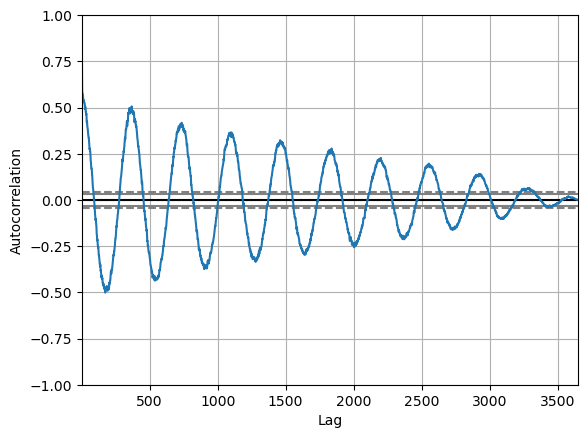

In [14]:
pd.plotting.autocorrelation_plot(series)
plt.show()

Las líneas horizontales en el gráfico corresponden a bandas de confianza del $95\%$ y $99\%$. La línea punteada es la banda de confianza del $99\%$.